In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import itertools
################
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import loadtxt
import tensorflow.keras
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import *
%matplotlib inline
from tensorflow import keras
from keras import *
import keras
import cv2
import shutil
import os
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import regularizers
from keras.regularizers import l2
from sklearn.metrics import f1_score, precision_score, recall_score

In [3]:
!mkdir /content/drive/MyDrive/kaggledata/Negative/train
!mkdir /content/drive/MyDrive/kaggledata/Negative/train/0_normal
!mkdir /content/drive/MyDrive/kaggledata/Negative/train/1_ulcerative_colitis
!mkdir /content/drive/MyDrive/kaggledata/Negative/train/2_polyps
!mkdir /content/drive/MyDrive/kaggledata/Negative/train/3_esophagitis

In [8]:
import os
import shutil

source_dir = "/content/drive/MyDrive/kaggledata/train/0_normal"
destination_dir = "/content/drive/MyDrive/kaggledata/Negative/train/0_normal"

files = os.listdir(source_dir)

for file_name in files:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copy(source_file, destination_file)

print("All files have been copied successfully.")

All files have been copied successfully.


In [14]:
# TRAIN :
path1='/content/drive/MyDrive/kaggledata/Negative/train/0_normal'
path2='/content/drive/MyDrive/kaggledata/Negative/train/1_ulcerative_colitis'
path3='/content/drive/MyDrive/kaggledata/Negative/train/2_polyps'
path4='/content/drive/MyDrive/kaggledata/Negative/train/3_esophagitis'
files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)
files4=os.listdir(path4)
num_files1=len(files1)
num_files2=len(files2)
num_files3=len(files3)
num_files4=len(files4)
print('0_normal :  ',num_files1)
print('1_ulcerative_colitis :  ',num_files2)
print('2_polyps :  ',num_files3)
print('3_esophagitis :  ',num_files4)

0_normal :   1600
1_ulcerative_colitis :   1600
2_polyps :   1600
3_esophagitis :   1600


#Negative


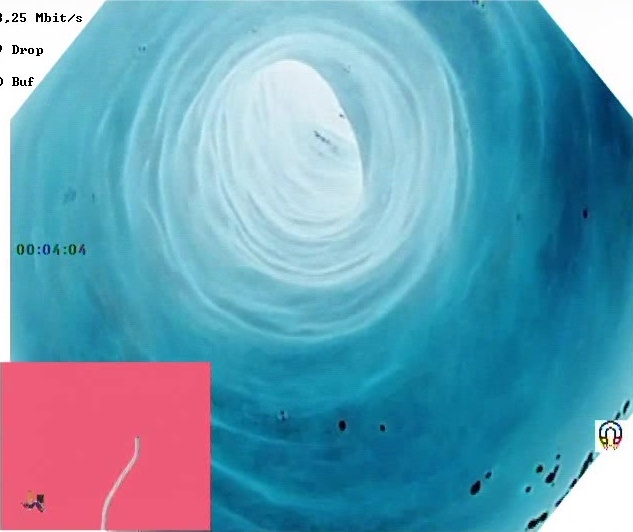

In [13]:
dataset_path = '/content/drive/MyDrive/kaggledata/Negative/train/0_normal'

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)

        negative_img = cv2.bitwise_not(img)

        cv2.imwrite(os.path.join(dataset_path, "negative_" + filename), negative_img)

###################################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/Negative/train/1_ulcerative_colitis'

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)

        negative_img = cv2.bitwise_not(img)

        cv2.imwrite(os.path.join(dataset_path, "negative_" + filename), negative_img)

###################################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/Negative/train/2_polyps'

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)

        negative_img = cv2.bitwise_not(img)

        cv2.imwrite(os.path.join(dataset_path, "negative_" + filename), negative_img)
###################################################################################

dataset_path = '/content/drive/MyDrive/kaggledata/Negative/train/3_esophagitis'

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)

        negative_img = cv2.bitwise_not(img)

        cv2.imwrite(os.path.join(dataset_path, "negative_" + filename), negative_img)

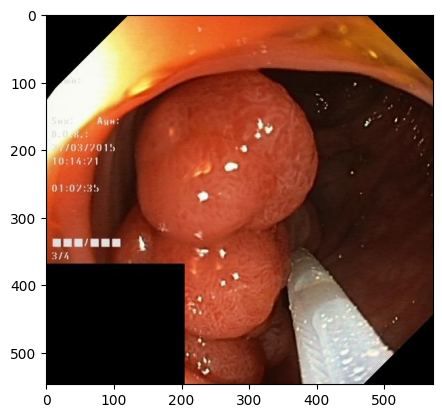

In [25]:
img = image.load_img('/content/drive/MyDrive/kaggledata/Negative/train/2_polyps/train_polyps_ (240).jpg')
plt.imshow(img)

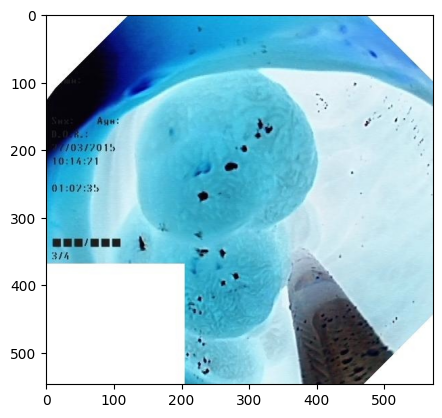

In [24]:
img = image.load_img('/content/drive/MyDrive/kaggledata/Negative/train/2_polyps/negative_train_polyps_ (240).jpg')
plt.imshow(img)

In [8]:
train_set='/content/drive/MyDrive/kaggledata/Negative/train'
val_set='/content/drive/MyDrive/kaggledata/val'
test_set='/content/drive/MyDrive/kaggledata/test'

train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=False,
    class_mode = 'categorical')

Found 6400 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [10]:

base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model20 = Sequential()
model20.add(base_model)
model20.add(GaussianNoise(0.35))
model20.add(GlobalAveragePooling2D())
model20.add(Dense(256,activation='relu'))
model20.add(BatchNormalization())
model20.add(GaussianNoise(0.35))
model20.add(Dropout(0.2))
model20.add(Dense(4, activation='softmax'))
model20.summary()

model20.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

checkpoint = ModelCheckpoint("model20.best.keras",monitor="val_accuracy",save_weights_only=True,mode="max",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 20, min_delta = 0.001,
                              mode='auto',verbose=1)
callbacks2=[checkpoint,reduce_lr]

history20 = model20.fit(
    train_generator,
    steps_per_epoch=60, 
    epochs = 50,    
    validation_data = validation_generator,
    callbacks=callbacks2,
)

# Save the training history to a file
import pickle

with open('training_history20.pkl', 'wb') as file:
    pickle.dump(history20.history, file)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise_2 (Gaussian  (None, 7, 7, 1408)        0         
 Noise)                                                          
                                                                 
 global_average_pooling2d_1  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               360704    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [14]:
model20.load_weights('model20.best.keras')
model20.evaluate(test_generator)
#loss: 0.1058 - accuracy: 0.9638 - precision: 0.9638 - recall: 0.9638 - auc: 0.9965
#loss: 0.1011 - accuracy: 0.9625 - precision: 0.9625 - recall: 0.9613 - auc: 0.9973
#loss: 0.1117 - accuracy: 0.9588 - precision: 0.9598 - recall: 0.9563 - auc: 0.9971
#acc_avg : 0.9617
model20.evaluate(validation_generator)
#loss: 0.1301 - accuracy: 0.9500 - precision: 0.9505 - recall: 0.9500 - auc: 0.9963
#loss: 0.1379 - accuracy: 0.9540 - precision: 0.9549 - recall: 0.9535 - auc: 0.9955
#loss: 0.1457 - accuracy: 0.9505 - precision: 0.9519 - recall: 0.9490 - auc: 0.9952
#acc_avg : 0.9515

125/125 [==============================] - 54s 430ms/step - loss: 0.1457 - accuracy: 0.9505 - precision: 0.9519 - recall: 0.9490 - auc: 0.9952


[0.14568926393985748,
 0.9505000114440918,
 0.9518555402755737,
 0.9490000009536743,
 0.9952021837234497]

<ipython-input-12-748efd974f5f>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = np.argmax(model20.predict_generator(test_generator), axis=1)


F1 Score for all classes: 0.9624616626393661
Precision for all classes: 0.9634131444157537
Recall for all classes: 0.9625
Confusion Matrix : 
 [[200   0   0   0]
 [  1 179  20   0]
 [  0   8 192   0]
 [  0   0   1 199]]


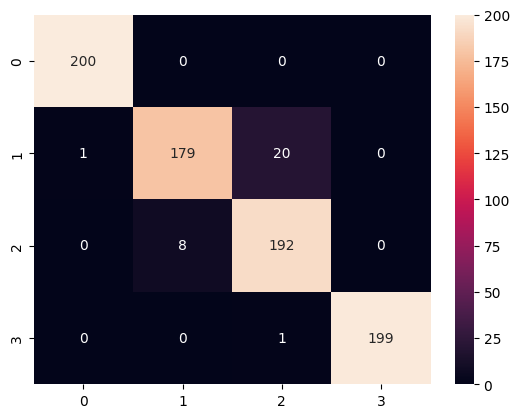

In [12]:
model20.load_weights('model20.best.keras')
Y_pred = np.argmax(model20.predict_generator(test_generator), axis=1)
Y_test = test_generator.classes
X_test= test_generator

f1 = f1_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print("F1 Score for all classes:", f1)
print("Precision for all classes:", precision)
print("Recall for all classes:", recall)

cm1 = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm1)
cm = sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,fmt="d")